Binomes : seddiki tesnyme 
          benlarbi nesrine 

# 1- Importantion des librairies necessaires au travail

In [161]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Lecture des fichiers d'amplitude et coordonnées

In [162]:
file=open("Cols1.npy","rb")
file1=open("lines1.npy","rb")
file2=open("amplitude1.npy","rb")

liste =np.load(file)
liste1 =np.load(file1)
liste2=np.load(file2)
print(liste2)

# Echantillonage

In [163]:

width=len(liste)
height=len(liste1)
width_matrice=int(width/5+width%5)
height_matrice=int(height/5+height%5)
matrice = np.ones ((height_matrice ,width_matrice))

i=0 
x=0
while i< height :
    j=0 
    y=0
    while j <width :
        pos_x= int(liste1[i]*1000)
        pos_y=int(liste[j]*1000)
        matrice[x][y]=int(liste2[pos_x][pos_y])
        j=j+5
        y=y+1

    x=x+1
    i=i+5

# réaliser l'échantillonage

Fonction Grey pour le niveau de gris 

In [164]:
def grey (y, plage) :
    t=len(plage)
    find =False

    val=-1

    i=0

    while  find==False  and i<t :
        if y >= plage[i][0] and y<=plage[i][1] :
            find =True
            plage_val =plage[i]
            val=plage_val[2]
            
    
        i=i+1  

     

    return val         
         



# Quantification

In [165]:
nBits=4
# calculer le nombre de niveaux de gris
L= pow(2,nBits)
#réaliser la quantification

#trouver le min 
#trouver le max 
min =matrice [0][0]
max =matrice [0][0]

for i in range(height_matrice) :
    for j in range(width_matrice):
        if min > matrice[i][j]:
            min = matrice[i][j]

        if max < matrice [i][j]:
            max =matrice[i][j]

#print ("voici le min=", min)
#print("voici le max =", max)

nbr =int(max /L)


plage=[[0,nbr,0]]
i=2

while i<L:
    
    plage_val =[(i-1)*nbr+1,i*nbr,i-1]
    plage.append(plage_val)
 
    i=i+1 

plage_val =[(i-1)*nbr+1,max,L-1]
plage.append(plage_val)

print(plage)
for i in range(height_matrice):
    for j in range(width_matrice): 
        x= matrice[i][j]
        y=grey (x,plage)
        matrice[i][j]=y

        






[[0, 62, 0], [63, 124, 1], [125, 186, 2], [187, 248, 3], [249, 310, 4], [311, 372, 5], [373, 434, 6], [435, 496, 7], [497, 558, 8], [559, 620, 9], [621, 682, 10], [683, 744, 11], [745, 806, 12], [807, 868, 13], [869, 930, 14], [931, 1000.0, 15]]


# Afficher l'image résultante

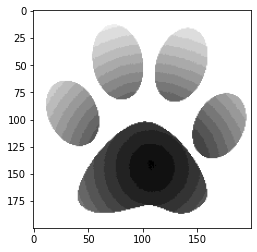

In [166]:
plt.imshow(matrice,cmap='gray')

# Sauvegarder l'image résultante

In [167]:
plt.imsave("résultat.png", matrice, cmap='gray')

# Lecture et affichage d'une autre image 


In [168]:
# lecture de l'image en niveau de gris
image = cv2.imread('toAdd.bmp',0)

# Réaliser les operations sur l'image

Addition des deux images

In [169]:
def redimentionner (image1 , image2 ):
    height , width = np.shape(image1)
    imgResize = cv2.resize(image2, (width,height))
    return imgResize

In [170]:
def aditionner (image1 , image2):
   
    imageResize=redimentionner (image1 ,image2)

    height , width =np.shape(image1)
    matAdd = np.ones((height,width))
    for i in range (height) :
        for j in range(width) :
            matAdd[i][j]=image1[i][j]+imageResize[i][j]

    return matAdd        


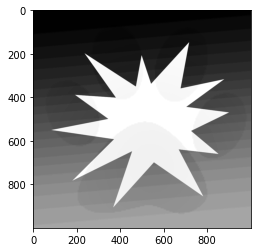

In [171]:
imgAdd= aditionner(image,matrice)
plt.imshow(imgAdd,cmap='gray')
plt.imsave("add.png", imgAdd, cmap='gray')



Negatif de l'image

In [172]:
imgNeg=np.ones((height_matrice,width_matrice))
for i in range(height_matrice):
    for j in range(width_matrice):
        imgNeg[i][j]=255-matrice[i][j]
        


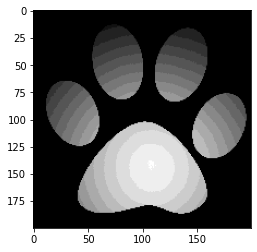

In [173]:

# afficher l'image résultante
plt.imshow(imgNeg,cmap='gray')
plt.imsave("imgNeg.png", imgNeg, cmap='gray')